## Hybrid method: Recursive feature addition

**Rank the features** according to **their importanc**e derived from a machine learning algorithm (tree importance or coefficients)! Build a **machine learning model with only 1 feature**, the **most important one**, and calculate the model metric for performance! Add one feature -the most important- and build a machine learning algorithm utilising the added and any feature from previous rounds! Calculate a performance metric of choice: **roc-auc, mse, rmse, accuracy,** etc! If the **metric increases by more of an arbitrarily set threshold**, then **that feature is important** and should be kept. Otherwise,**remove that feature!** Repeat these steps until all features have been evaluated.

**This hybrid method derives the importance** derived from the machine learning algorithm, **like embedded methods**! It builds several machine learning models, like **wrapper methods**. It is **faster than wrapper methods** and **often better than embedded methods**. In practice it **works extremely well**. 

One thing to note is that the **minimum drop in performance** to decide if a **feature should be kept** is set arbitrarily. The smaller the drop the more features will be selected, and vice versa.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, r2_score

## Classification

In [38]:
data = pd.read_csv('dataset_1.csv')
data.shape

(50000, 301)

In [39]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


**Important**

Select the features by **examining only the training set** to **avoid overfit.**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((35000, 300), (15000, 300))

### Remove constant and quasi-constant features

In [41]:
quasi_constant_feat = []
for feature in X_train.columns:  # find the predominant value!
    predominant = (X_train[feature].value_counts() / float(
        len(X_train))).sort_values(ascending=False).values[0]
    if predominant > 0.998:   # Evaluate it, more than 99% of the observations?
        quasi_constant_feat.append(feature)  # if yes, add the variable to the list
X_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)
X_train.shape, X_test.shape

((35000, 158), (15000, 158))

### Remove duplicated

In [42]:
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


6

**Remove duplicated features!**

In [43]:
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)
X_train.shape, X_test.shape

((35000, 152), (15000, 152))

### Train a ML model with all features

**Build a machine learning algorithm** using all the available features! **Determine the importance of the features** according to the algorithm!

In [44]:
model_full = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)
model_full.fit(X_train, y_train)
y_pred_test = model_full.predict_proba(X_test)[:, 1]
roc_full = roc_auc_score(y_test, y_pred_test)  # calculate the roc-auc!
print('Test ROC AUC=%f' % (roc_full))

Test ROC AUC=0.827532


### Rank features by importance

**Derive the importance** of each feature! **Rank them from the most to the least important! Plot!

Text(0.5, 0, 'Feature')

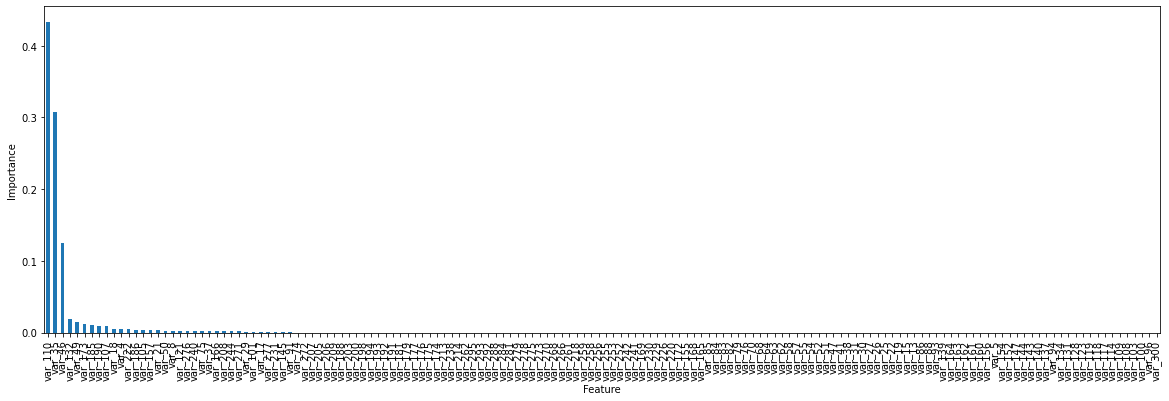

In [45]:
features = pd.Series(model_full.feature_importances_)
features.index = X_train.columns
features.sort_values(ascending=False, inplace=True)
features.plot.bar(figsize=(20,6))# plot
plt.ylabel('Importance')
plt.xlabel('Feature')

**Make list of ordered features!**

In [46]:
features = list(features.index)
features

['var_110',
 'var_35',
 'var_46',
 'var_132',
 'var_49',
 'var_173',
 'var_185',
 'var_190',
 'var_107',
 'var_18',
 'var_4',
 'var_222',
 'var_186',
 'var_105',
 'var_157',
 'var_21',
 'var_50',
 'var_8',
 'var_121',
 'var_276',
 'var_240',
 'var_75',
 'var_37',
 'var_166',
 'var_208',
 'var_244',
 'var_271',
 'var_29',
 'var_101',
 'var_17',
 'var_277',
 'var_231',
 'var_145',
 'var_91',
 'var_74',
 'var_272',
 'var_207',
 'var_205',
 'var_206',
 'var_209',
 'var_188',
 'var_203',
 'var_200',
 'var_198',
 'var_194',
 'var_193',
 'var_192',
 'var_191',
 'var_181',
 'var_179',
 'var_177',
 'var_176',
 'var_175',
 'var_174',
 'var_213',
 'var_238',
 'var_214',
 'var_262',
 'var_295',
 'var_293',
 'var_292',
 'var_288',
 'var_284',
 'var_281',
 'var_279',
 'var_278',
 'var_275',
 'var_273',
 'var_270',
 'var_268',
 'var_266',
 'var_261',
 'var_218',
 'var_259',
 'var_258',
 'var_256',
 'var_255',
 'var_253',
 'var_252',
 'var_242',
 'var_241',
 'var_169',
 'var_230',
 'var_229',
 'var_22

### Build a ML model with 1 feature

**Build a machine learning algorithm** using only the most important feature! Train **using only the most important feature**! Calculate the **roc-auc** in the test set!

In [47]:
model_one_feature = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)
model_one_feature.fit(X_train[features[0]].to_frame(), y_train)
y_pred_test = model_one_feature.predict_proba(X_test[features[0]].to_frame())[:, 1]
roc_first = roc_auc_score(y_test, y_pred_test)
print('Test one feature xgb ROC AUC=%f' % (roc_first))

Test one feature xgb ROC AUC=0.700436


### Select features

The final step --> **Remove one at a time**, from the **most to the least important**! Build model at each round. **Calculate the new r2** ! If the **new r2 is bigger** than the original one, **keep** that feature! Otherwise, **remove** it! **Recursive feature addition:** First **arbitrarily set the drop in r2** ! If the drop is above this threshold, keep the feature!

In [51]:
tol = 0.0001
print('doing recursive feature addition')
features_to_keep = [features[0]]
count = 1  # set a counter to know which feature is being evaluated!
for feature in features[1:]:  #Loop over all the features, in order of importance:
    print()
    print('testing feature: ', feature, count, ' out of ', len(features))
    count = count + 1  # initialise model
    model_int = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)
    model_int.fit(  # fit model with the selected features!
        X_train[features_to_keep + [feature] ], y_train)
    y_pred_test = model_int.predict_proba(   # make a prediction!
        X_test[features_to_keep + [feature] ])[:, 1]
    roc_int = roc_auc_score(y_test, y_pred_test)   # calculate the new roc-auc
    print('New Test ROC AUC={}'.format((roc_int)))
    print('Previous round Test ROC AUC={}'.format((roc_first))) # print the original roc-auc!
    diff_roc = roc_int - roc_first  # determine the increase in the roc-auc
    if diff_roc >= tol:  # Compare!
        print('Increase in ROC AUC={}'.format(diff_roc))
        print('keep: ', feature)
        print    # if the increase in the roc is bigger than the threshold keep the feature!
        roc_first = roc_int
        features_to_keep.append(feature)   # Append the feature to keep to the list
    else:   # Ignore the feature
        print('Increase in ROC AUC={}'.format(diff_roc))
        print('remove: ', feature)
        print     # now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to keep: ', len(features_to_keep))

doing recursive feature addition

testing feature:  var_35 1  out of  152
New Test ROC AUC=0.8126631456095583
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.017080065899720442
remove:  var_35

testing feature:  var_46 2  out of  152
New Test ROC AUC=0.723724012422606
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.10601919908667279
remove:  var_46

testing feature:  var_132 3  out of  152
New Test ROC AUC=0.783835069841835
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.045908141667443725
remove:  var_132

testing feature:  var_49 4  out of  152
New Test ROC AUC=0.7725592659471954
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.057183945562083394
remove:  var_49

testing feature:  var_173 5  out of  152
New Test ROC AUC=0.7068031005648951
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.12294011094438362
remove:  var_173

testing feature:  var_185 6  out of  152
New Test ROC AU

New Test ROC AUC=0.7203960765363648
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.10934713497291393
remove:  var_191

testing feature:  var_181 48  out of  152
New Test ROC AUC=0.7200105123053316
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.10973269920394713
remove:  var_181

testing feature:  var_179 49  out of  152
New Test ROC AUC=0.7159438891573484
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.11379932235193035
remove:  var_179

testing feature:  var_177 50  out of  152
New Test ROC AUC=0.7017235659322182
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.12801964557706058
remove:  var_177

testing feature:  var_176 51  out of  152
New Test ROC AUC=0.7011681658005319
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.1285750457087469
remove:  var_176

testing feature:  var_175 52  out of  152
New Test ROC AUC=0.7173958306840629
Previous round Test ROC AUC=0.829743211509278

New Test ROC AUC=0.7215726069669456
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.10817060454233318
remove:  var_82

testing feature:  var_79 94  out of  152
New Test ROC AUC=0.7203161604087366
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.10942705110054218
remove:  var_79

testing feature:  var_76 95  out of  152
New Test ROC AUC=0.7779995535096121
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.051743657999666626
remove:  var_76

testing feature:  var_70 96  out of  152
New Test ROC AUC=0.7022080927795722
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.12753511872970658
remove:  var_70

testing feature:  var_68 97  out of  152
New Test ROC AUC=0.7075600995843118
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.122183111924967
remove:  var_68

testing feature:  var_64 98  out of  152
New Test ROC AUC=0.7271371771069118
Previous round Test ROC AUC=0.8297432115092788
Increase

New Test ROC AUC=0.721754537670507
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.10798867383877175
remove:  var_131

testing feature:  var_128 140  out of  152
New Test ROC AUC=0.7019955859621161
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.12774762554716268
remove:  var_128

testing feature:  var_123 141  out of  152
New Test ROC AUC=0.7318350472347267
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.09790816427455207
remove:  var_123

testing feature:  var_119 142  out of  152
New Test ROC AUC=0.7011218777464104
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.12862133376286833
remove:  var_119

testing feature:  var_118 143  out of  152
New Test ROC AUC=0.7114497655925464
Previous round Test ROC AUC=0.8297432115092788
Increase in ROC AUC=-0.11829344591673241
remove:  var_118

testing feature:  var_117 144  out of  152
New Test ROC AUC=0.7230517335413187
Previous round Test ROC AUC=0.8297432115

**Finally, let's compare performance of a model built using the selected features vs the full model! Build initial model!**

In [52]:
model_final = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)
model_final.fit(X_train[features_to_keep], y_train)  # fit the model with the selected features
y_pred_test = model_final.predict_proba(X_test[features_to_keep])[:, 1]  # make predictions
roc_final = roc_auc_score(y_test, y_pred_test)  # calculate roc-auc
print('Test selected features ROC AUC=%f' % (roc_final))

Test selected features ROC AUC=0.700436


As you can see, the **Gradient Boosting model** built with 15 features shows a **similar performance** than the one built the full dataset (you need to scroll up to find this value, we calculated a few cells ago).

**Exercise** Why don't you go ahead and try **different values of tolerance**? Try with **lower and bigger thresholds** and get a feeling of how much this affects the number of selected features.

## Regression

In [55]:
data = pd.read_csv('HousingPrices_train.csv')
data.shape

(1460, 81)

**In practice, feature selection should be done **after data pre-processing,** so ideally, all the **categorical variables are encoded into numbers**, and then you can assess **how deterministic** they are of the target! Here for simplicity I will use only numerical variables! Select numerical columns:**

In [56]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Id','SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [58]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Rank features by importance

**Build a machine learning algorithm** using all the available features! **Determine the importance** of the features according to the algorithm! Build initial model using all the features! **Calculate r2 in the test set!**

In [59]:
model_full = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)
model_full.fit(X_train, y_train)
y_pred_test = model_full.predict(X_test)
r2_full = r2_score(y_test, y_pred_test)
print('Test full dataset R2 = %f' % (r2_full))

Test full dataset R2 = 0.713130


**Derive the importance of each feature! Rank them from the most to the least important! Plot!**

<AxesSubplot:>

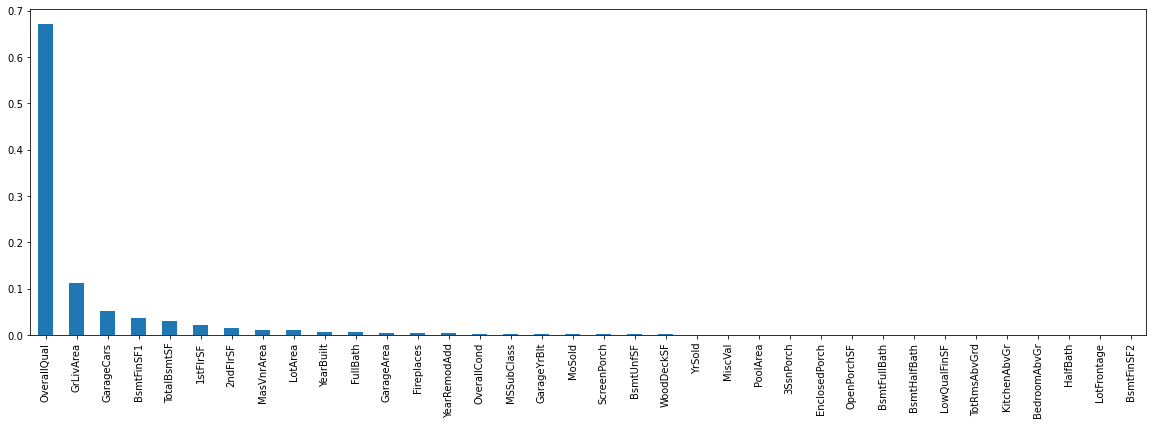

In [60]:
features = pd.Series(model_full.feature_importances_)  # get feature name and importance
features.index = X_train.columns
features.sort_values(ascending=False, inplace=True)  # sort the features by importance
features.plot.bar(figsize=(20,6))  # plot

**Make list of ordered features!**

In [61]:
features = list(features.index)
features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'MasVnrArea',
 'LotArea',
 'YearBuilt',
 'FullBath',
 'GarageArea',
 'Fireplaces',
 'YearRemodAdd',
 'OverallCond',
 'MSSubClass',
 'GarageYrBlt',
 'MoSold',
 'ScreenPorch',
 'BsmtUnfSF',
 'WoodDeckSF',
 'YrSold',
 'MiscVal',
 'PoolArea',
 '3SsnPorch',
 'EnclosedPorch',
 'OpenPorchSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'LowQualFinSF',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'HalfBath',
 'LotFrontage',
 'BsmtFinSF2']

### Build ML model with 1 feature

Build a machine learning algorithm **using only the most important feature**! Build initial model with 1 feature!

In [62]:
model_one_feature = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)
model_one_feature.fit(X_train[features[0]].to_frame(), y_train)  # Most important feature!

y_pred_test = model_one_feature.predict(X_test[features[0]].to_frame())  # calculate the r2
r2_first = r2_score(y_test, y_pred_test)
print('Test one feature R2=%f' % (r2_first))

Test one feature R2=0.631051


### Select features

The final step --> **Remove one at a time**, from the **most to the least important**! Build model at each round. **Calculate the new r2** ! If the **new r2 is bigger** than the original one, **keep** that feature! Otherwise, **remove** it! **Recursive feature addition:** First **arbitrarily set the drop in r2** ! If the drop is above this threshold, keep the feature!

In [63]:
tol = 0.001
print('doing recursive feature addition')
features_to_keep = [features[0]]
count = 1  # set a counter to know how far ahead the loop is going!
for feature in features[1:]:   # Loop over all the features, in order of importance:
    print()
    print('testing feature: ', feature, count, ' out of ', len(features))
    count = count + 1  # initialise model
    model_int = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)
    model_int.fit(X_train[features_to_keep + [feature] ], y_train) # fit model
    y_pred_test = model_int.predict(X_test[features_to_keep + [feature] ])  # make a prediction!
    r2_int = r2_score(y_test, y_pred_test)  # calculate the new r2
    print('New Test R2={}'.format((r2_int)))
    print('Previous round R2={}'.format((r2_first)))  # print the original roc-auc!
    diff_r2 = r2_int - r2_first  # determine the drop in the roc-auc
    if diff_r2 >= tol:  # compare the increase in r2 with the tolerance we set previously
        print('Increase in r2 = {}'.format(diff_r2))
        print('keep: ', feature)
        print
        r2_first = r2_int  # if the increase in the r2 > the threshold, keep the feature!
        features_to_keep.append(feature)   # Append the feature to keep to the list
    else:
        
        print('Increase in r2 = {}'.format(diff_r2))  # ignore the feature
        print('remove: ', feature)
        print
print('DONE!!')  # now the loop is finished, we evaluated all the features
print('total features to keep: ', len(features_to_keep))

doing recursive feature addition

testing feature:  GrLivArea 1  out of  36
New Test R2=0.7059734876125235
Previous round R2=0.6310512609331753
Increase in r2 = 0.07492222667934822
keep:  GrLivArea

testing feature:  GarageCars 2  out of  36
New Test R2=0.7163472150540834
Previous round R2=0.7059734876125235
Increase in r2 = 0.010373727441559843
keep:  GarageCars

testing feature:  BsmtFinSF1 3  out of  36
New Test R2=0.7123499142207127
Previous round R2=0.7163472150540834
Increase in r2 = -0.003997300833370687
remove:  BsmtFinSF1

testing feature:  TotalBsmtSF 4  out of  36
New Test R2=0.7340937364428985
Previous round R2=0.7163472150540834
Increase in r2 = 0.017746521388815162
keep:  TotalBsmtSF

testing feature:  1stFlrSF 5  out of  36
New Test R2=0.7373851754622972
Previous round R2=0.7340937364428985
Increase in r2 = 0.0032914390193986565
keep:  1stFlrSF

testing feature:  2ndFlrSF 6  out of  36
New Test R2=0.7453233235301489
Previous round R2=0.7373851754622972
Increase in r2 = 0

**Test the performance of the model built on the selected features! Build initial model!**

In [64]:
model_final = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)
model_final.fit(X_train[features_to_keep], y_train)  # fit the model!
y_pred_test = model_final.predict(X_test[features_to_keep])  # make predictions
r2_final = r2_score(y_test, y_pred_test)  # calculate roc-auc
print('Test selected features r2 = %f' % (r2_final))

Test selected features r2 = 0.745323


The model built with **12 features** shows **better performance**! (you need to scroll up to find this value, we calculated a few cells ago). Go ahead and try **different tol values** to examine the sensitivity of this algorithm.